<a href="https://colab.research.google.com/github/vigneshsharma1997/Assignments/blob/main/Logistic__Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
%matplotlib inline

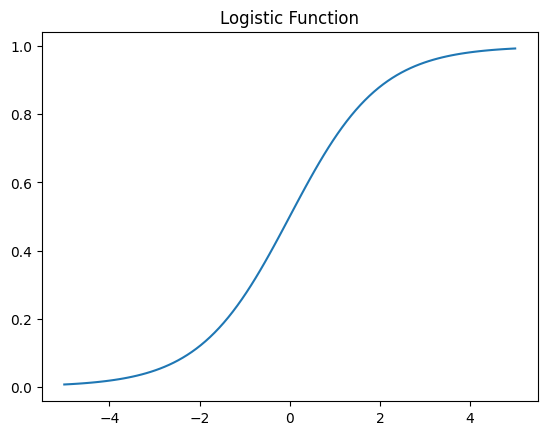

In [3]:
x_values = np.linspace(-5,5,100)
y_values = [1/(1+np.exp(-x)) for x in x_values]
plt.plot(x_values,y_values)
plt.title('Logistic Function')
plt.show()

In [4]:
url ='https://raw.githubusercontent.com/vigneshsharma1997/Assignments/main/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(url)

In [5]:
df.shape

(7043, 21)

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#EDA Independent Variables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


AttributeError: ignored

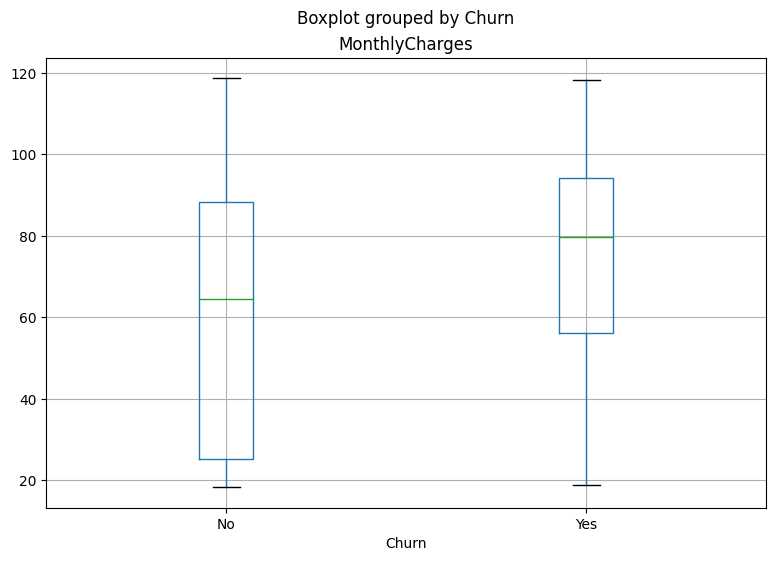

In [9]:
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
df.boxplot(column='MonthlyCharges', by ='Churn',ax=ax)
ax.setylabel('MonthlyCharges')
plt.show()

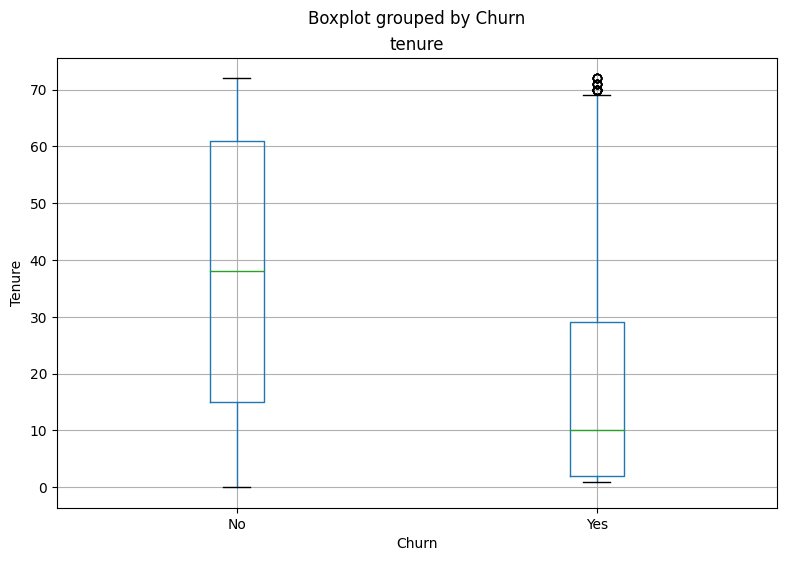

In [8]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'tenure', by = 'Churn', ax = ax)
ax.set_ylabel("Tenure")
plt.show()

In [13]:
df['class'] = df['Churn'].apply(lambda x : 1 if x == "Yes" else 0)
# features will be saved as X and our target will be saved as y
x = df[['tenure','MonthlyCharges']].copy()
y = df['class'].copy()

In [15]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( x,y, test_size = 0.2, random_state = 0) 
print(x_train.shape)
print(x_test.shape)

(5634, 2)
(1409, 2)


In [16]:
y_train.value_counts()

0    4133
1    1501
Name: class, dtype: int64

In [18]:
y_test.value_counts()

0    1041
1     368
Name: class, dtype: int64

In [20]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True,max_iter=10000)
clf.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [22]:
#Get Model coefficients
clf.coef_

array([[-0.05646728,  0.03315385]])

In [23]:
clf.intercept_

array([-1.77408975])

In [24]:
#Evaluating the performance of trained Model
train_preds = clf.predict_proba(x_train)
test_preds = clf.predict_proba(x_test)

In [25]:
x_test

,tenure,MonthlyCharges
2200,19,58.20
4627,60,116.60
3225,13,71.95
2828,1,20.45
3768,55,77.75
...,...,...
2631,7,99.25
5333,13,88.35
6972,56,111.95
4598,18,56.25


In [26]:
test_preds

array([[0.7145149 , 0.2854851 ],
       [0.78522641, 0.21477359],
       [0.53064776, 0.46935224],
       ...,
       [0.77288679, 0.22711321],
       [0.71618111, 0.28381889],
       [0.57740038, 0.42259962]])

In [28]:
train_preds = clf.predict_proba(x_train)[:,1]
test_preds = clf.predict_proba(x_test)[:,1]

In [29]:
test_preds

array([0.2854851 , 0.21477359, 0.46935224, ..., 0.22711321, 0.28381889,
       0.42259962])

In [30]:
#Get the predicted classes
train_class_preds = clf.predict(x_train)
test_class_preds = clf.predict(x_test)

In [31]:
train_class_preds

array([0, 0, 0, ..., 0, 1, 0])

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [34]:
#Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7857649982250621
The accuracy on test data is  0.7735982966643009


[[3745  388]
 [ 819  682]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

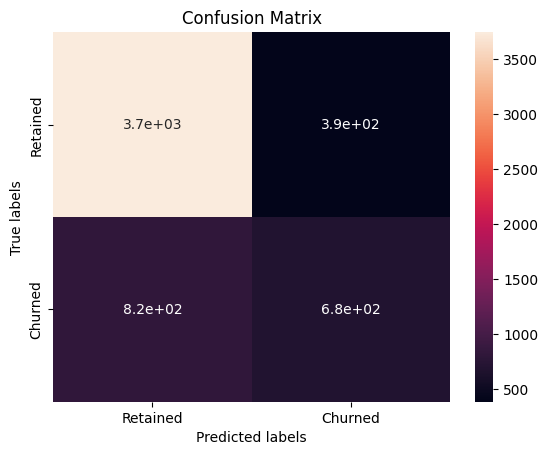

In [35]:
# Get the confusion matrix for both train and test
labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[934 107]
 [212 156]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

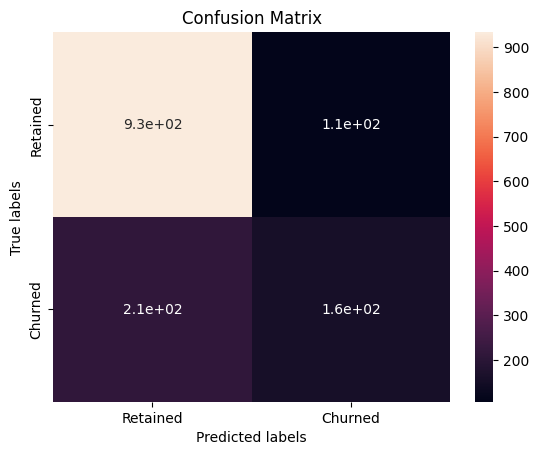

In [36]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [37]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

logistic = LogisticRegression()

scoring = ['accuracy']
scores = cross_validate(logistic,x_train,y_train,scoring=scoring,cv=5,return_train_score=True,return_estimator=True,verbose = 10)

[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.785, test=0.789) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.787, test=0.791) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.788, test=0.771) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.789, test=0.775) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.781, test=0.806) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [38]:
scores['train_accuracy']


array([0.78500111, 0.78677613, 0.78788551, 0.78877302, 0.78127773])

In [39]:
scores['test_accuracy']

array([0.78881988, 0.79148181, 0.77107365, 0.77462289, 0.80639432])

In [40]:
scores['estimator']

[LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression()]

In [41]:
for model in scores['estimator']:
    print(model.coef_)

[[-0.05617762  0.03293792]]
[[-0.05562275  0.03215852]]
[[-0.05820295  0.03454813]]
[[-0.05711808  0.03362381]]
[[-0.05530045  0.03257423]]
